# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [171]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 261


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [172]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=imperial&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | porto novo
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | hawaiian paradise park


Processing Record 9 of Set 1 | crucecita
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | saipan
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | al bardiyah
Processing Record 20 of Set 1 | stanley
Processing Record 21 of Set 1 | cabras
Processing Record 22 of Set 1 | kismayo
Processing Record 23 of Set 1 | milan
Processing Record 24 of Set 1 | oleksandriys'ke
Processing Record 25 of Set 1 | levuka
Processing Record 26 of Set 1 | lebu
Processing Record 27 of Set 1 | bethel
Processing Record 28 of Set 1 | kone
Processing Record 29 of Set 1 | kununurra
Processing Record 30 of Set 1 | pingliang
Processing Record 31 of Set 1 | longyearbyen
Processing Record 32 of Set 1 | tobelo
Proce

In [173]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          252
Lat           252
Lng           252
Max Temp      252
Humidity      252
Cloudiness    252
Wind Speed    252
Country       252
Date          252
dtype: int64

In [174]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,55.49,85,3,21.52,NZ,1699915453
1,ushuaia,-54.8000,-68.3000,40.62,70,40,32.01,AR,1699915365
2,margaret river,-33.9500,115.0667,59.90,86,99,11.86,AU,1699915595
3,porto novo,6.4965,2.6036,78.62,86,2,5.48,BJ,1699915530
4,yellowknife,62.4560,-114.3525,18.12,93,100,2.30,CA,1699915588


In [175]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [176]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,55.49,85,3,21.52,NZ,1699915453
1,ushuaia,-54.8000,-68.3000,40.62,70,40,32.01,AR,1699915365
2,margaret river,-33.9500,115.0667,59.90,86,99,11.86,AU,1699915595
3,porto novo,6.4965,2.6036,78.62,86,2,5.48,BJ,1699915530
4,yellowknife,62.4560,-114.3525,18.12,93,100,2.30,CA,1699915588


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

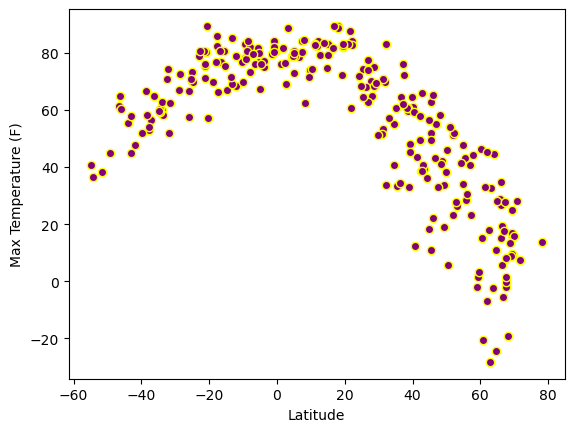

In [177]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
plt.scatter(x, y, edgecolor="yellow", color="purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/latvtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

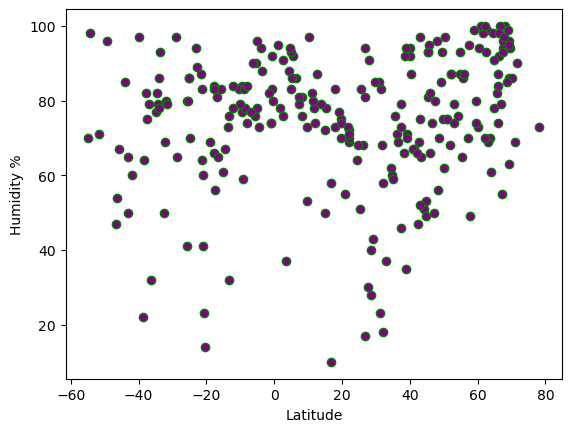

In [178]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]
plt.scatter(x, y, edgecolor="green", color="purple")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the figure
plt.savefig("output_data/latvhumid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

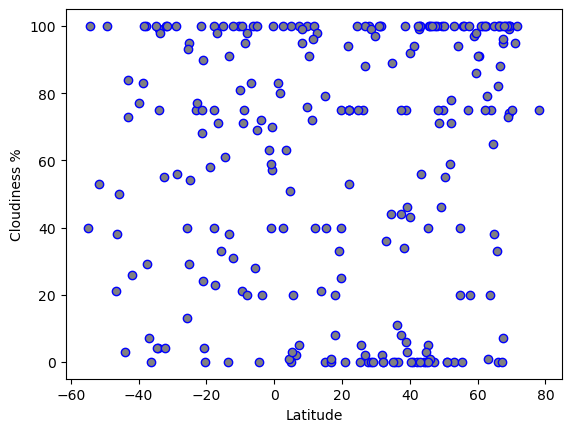

In [179]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, edgecolor="blue", color="gray")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Save the figure
plt.savefig("output_data/latvcloudy.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

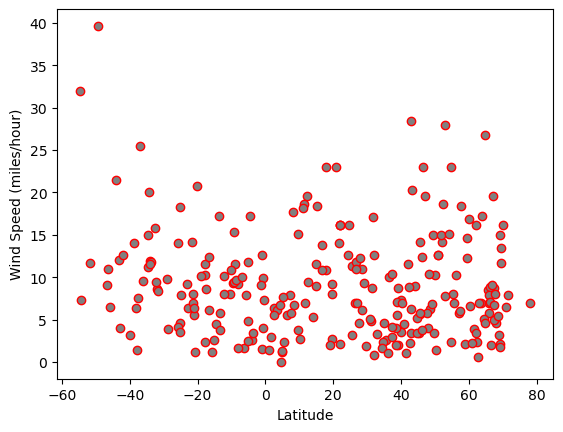

In [180]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
plt.scatter(x, y, edgecolor="red", color="gray")

# Incorporate the other graph properties
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (miles/hour)")

# Save the figure
plt.savefig("output_data/latvwind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: -0.09952616200951943.


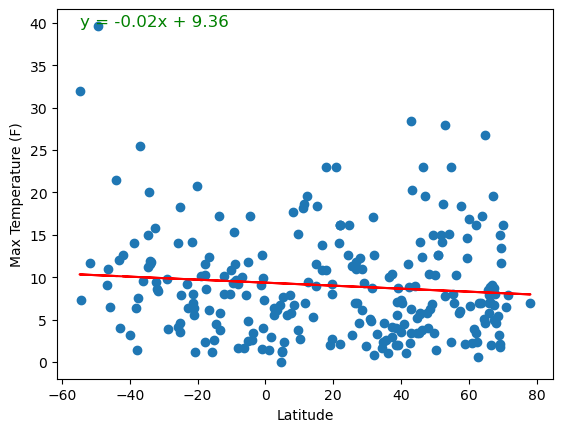

In [195]:
# Define a function to create Linear Regression plots

def Regression_scatter(weatherdata, xCol, yCol):
    x = weatherdata[xCol]
    y = weatherdata[yCol]

correlation = st.pearsonr(x, y)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(min(x), max(y), line_eq, color="green", fontsize=12)
print(f"The r-value is: {rvalue}.")

plt.plot(x, slope * x + intercept, color="red", label=f'regression line: y = {slope:.2f}x + {intercept:.2f}')
plt.scatter(x, y)
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Max Temperature (F)", fontsize=10)

plt.show()

In [182]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,porto novo,6.4965,2.6036,78.62,86,2,5.48,BJ,1699915530
4,yellowknife,62.4560,-114.3525,18.12,93,100,2.30,CA,1699915588
7,hawaiian paradise park,19.5933,-154.9731,81.90,75,75,8.05,US,1699915596
9,kapuskasing,49.4169,-82.4331,33.89,93,100,14.97,CA,1699915596
10,saipan,15.1355,145.7010,83.10,78,40,18.41,MP,1699915596


In [196]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,55.49,85,3,21.52,NZ,1699915453
1,ushuaia,-54.8000,-68.3000,40.62,70,40,32.01,AR,1699915365
2,margaret river,-33.9500,115.0667,59.90,86,99,11.86,AU,1699915595
5,edinburgh of the seven seas,-37.0676,-12.3116,56.52,79,7,25.46,SH,1699915443
6,adamstown,-25.0660,-130.1015,73.15,86,95,18.28,PN,1699915436


###  Temperature vs. Latitude Linear Regression Plot

In [184]:
# Linear regression on Northern Hemisphere
Regression_scatter(northern_hemi_df, "Max Temp", "Lat")
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.09952616200951943.


In [185]:
# Linear regression on Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Max Temp")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.09952616200951943.


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [186]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.09952616200951943


In [187]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Humidity")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.09952616200951943


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [188]:
# Northern Hemisphere
Regression_scatter(northern_hemi_df, "Lat", "Cloudiness")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.09952616200951943


In [189]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Cloudiness")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.09952616200951943


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [190]:
# Northern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Wind Speed")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.09952616200951943.


In [191]:
# Southern Hemisphere
Regression_scatter(southern_hemi_df, "Lat", "Wind Speed")
#plt.text(min(x), max(y), line_eq, color = "green", fontsize=12)
print(f"The r-value is: {rvalue}.")
plt.show()

The r-value is: -0.09952616200951943.


**Discussion about the linear relationship:** YOUR RESPONSE HERE